# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

pd.options.display.float_format = '{:,.0f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# for 311 data using json?
# df_311= pd.read_json('https://data.cityofnewyork.us/resource/erm2-nwe9.json')
# df_311

# For whole 311 dataset

In [12]:
# df_whole_311=pd.read_csv('311_21032023.csv')
# df_whole_311

# Graffiti 311 Dataset

Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

Filter for descriptor contains graffiti, grafiti, grafitti

In [13]:
df_graffiti=pd.read_csv('graffiti_311_requests.csv')
df_graffiti

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,35167404,01/04/2017 09:55:30 AM,05/01/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,"11,102",23-15 24 AVENUE,24 AVENUE,NaN,NaN,NaN,NaN,ADDRESS,Astoria,NaN,NaN,Closed,03/09/2017 03:51:10 PM,The City has removed the graffiti from this pr...,05/08/2017 03:08:23 PM,01 QUEENS,"4,008,750,003",QUEENS,"1,006,314","221,928",UNKNOWN,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.77578986128961, -73.92033666771977)"
1,56550511,01/17/2023 11:29:31 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,"11,377",37-33 55 STREET,55 STREET,NaN,NaN,NaN,NaN,ADDRESS,WOODSIDE,NaN,NaN,Open,03/16/2023 09:33:08 AM,The graffiti on this property has been schedul...,02/14/2023 09:33:08 AM,02 QUEENS,"4,012,100,038",QUEENS,"1,009,967","212,695",UNKNOWN,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.750437795493276, -73.90718263458892)"
2,56546245,01/17/2023 07:08:29 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,"11,221",162 CENTRAL AVENUE,CENTRAL AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,01/29/2023 01:20:14 PM,The property is due for inspection by the Depa...,03/11/2023 02:22:25 AM,04 BROOKLYN,"3,032,070,137",BROOKLYN,"1,004,425","194,044",UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.69925972729554, -73.92724063021649)"
3,56550515,01/17/2023 07:00:13 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,"10,467",320 EAST GUNHILL ROAD,EAST GUNHILL ROAD,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,06/19/2023 02:22:24 AM,The property has been scheduled to be inspecte...,03/11/2023 02:22:25 AM,07 BRONX,"2,033,480,042",BRONX,"1,019,158","259,514",UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.87891119631289, -73.87376716350293)"
4,56546841,01/17/2023 05:52:42 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,"11,237",238 STARR STREET,STARR STREET,NaN,NaN,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,01/29/2023 01:17:36 PM,The property is due for inspection by the Depa...,03/11/2023 02:22:25 AM,04 BROOKLYN,"3,031,990,030",BROOKLYN,"1,005,698","196,354",UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.705597139263496, -73.92264231257832)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213242,35162716,01/04/2017 03:28:18 PM,04/06/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,"10,452",1522 UNIVERSITY AVENUE,UNIVERSITY AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,04/16/2017 02:38:13 PM,The City has removed the graffiti from this pr...,04/17/2017 04:37:03 PM,05 BRONX,"2,028,750,039",BRONX,"1,005,789","247,374",UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.84563332622525, -73.92215055871587)"
213243,35162141,01/04/2017 03:19:57 PM,05/16/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,"10,452",1170 NELSON AVENUE,NELSON AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,04/16/2017 02:38:13 PM,The City has removed the graffiti from this pr...,05/18/2017 12:15:01 PM,04 BRONX,"2,025,150,001",BRONX,"1,004,771","244,226",UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.83699541229634, -73.92583959582576)"
213244,35162232,01/04/2017 12:04:12 PM,04/28/2017 12:00:00 AM,DSNY,Depar

In [14]:
df_graffiti['Location Type'].value_counts()

# df_graffiti.groupby('Borough')['Descriptor'].value_counts()



Mixed Use              75646
Comercial              55921
Residential            32591
Park                    7441
Highway                 4861
Bus Stop Shelter        2145
Street                  1289
Other                   1248
Bridge                   648
Street and Sidewalk      538
Street/Curbside          479
Sidewalk                 225
School                   210
Recreation Center         48
Street/Sidewalk           42
Beach                     41
Bike Lane                 15
Pool                      11
Lot                        3
Roadway Tunnel             3
Curb                       3
Overpass                   2
Garage                     1
Name: Location Type, dtype: int64

In [15]:
df_graffiti['year']=df_graffiti['Created Date'].str.extract("\d\d/\d\d/(\d\d\d\d)")
df_graffiti


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year
0,35167404,01/04/2017 09:55:30 AM,05/01/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,"11,102",23-15 24 AVENUE,24 AVENUE,NaN,NaN,NaN,NaN,ADDRESS,Astoria,NaN,NaN,Closed,03/09/2017 03:51:10 PM,The City has removed the graffiti from this pr...,05/08/2017 03:08:23 PM,01 QUEENS,"4,008,750,003",QUEENS,"1,006,314","221,928",UNKNOWN,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.77578986128961, -73.92033666771977)",2017
1,56550511,01/17/2023 11:29:31 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,"11,377",37-33 55 STREET,55 STREET,NaN,NaN,NaN,NaN,ADDRESS,WOODSIDE,NaN,NaN,Open,03/16/2023 09:33:08 AM,The graffiti on this property has been schedul...,02/14/2023 09:33:08 AM,02 QUEENS,"4,012,100,038",QUEENS,"1,009,967","212,695",UNKNOWN,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.750437795493276, -73.90718263458892)",2023
2,56546245,01/17/2023 07:08:29 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,"11,221",162 CENTRAL AVENUE,CENTRAL AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,01/29/2023 01:20:14 PM,The property is due for inspection by the Depa...,03/11/2023 02:22:25 AM,04 BROOKLYN,"3,032,070,137",BROOKLYN,"1,004,425","194,044",UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.69925972729554, -73.92724063021649)",2023
3,56550515,01/17/2023 07:00:13 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,"10,467",320 EAST GUNHILL ROAD,EAST GUNHILL ROAD,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,06/19/2023 02:22:24 AM,The property has been scheduled to be inspecte...,03/11/2023 02:22:25 AM,07 BRONX,"2,033,480,042",BRONX,"1,019,158","259,514",UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.87891119631289, -73.87376716350293)",2023
4,56546841,01/17/2023 05:52:42 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,"11,237",238 STARR STREET,STARR STREET,NaN,NaN,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Open,01/29/2023 01:17:36 PM,The property is due for inspection by the Depa...,03/11/2023 02:22:25 AM,04 BROOKLYN,"3,031,990,030",BROOKLYN,"1,005,698","196,354",UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.705597139263496, -73.92264231257832)",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213242,35162716,01/04/2017 03:28:18 PM,04/06/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,"10,452",1522 UNIVERSITY AVENUE,UNIVERSITY AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,04/16/2017 02:38:13 PM,The City has removed the graffiti from this pr...,04/17/2017 04:37:03 PM,05 BRONX,"2,028,750,039",BRONX,"1,005,789","247,374",UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.84563332622525, -73.92215055871587)",2017
213243,35162141,01/04/2017 03:19:57 PM,05/16/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,"10,452",1170 NELSON AVENUE,NELSON AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,04/16/2017 02:38:13 PM,The City has removed the graffiti from this pr...,05/18/2017 12:15:01 PM,04 BRONX,"2,025,150,001",BRONX,"1,004,771","244,226",UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"(40.83699541229634, -73.92583959582576)",2017
213244,35162232,01/04/2017 1

<Axes: >

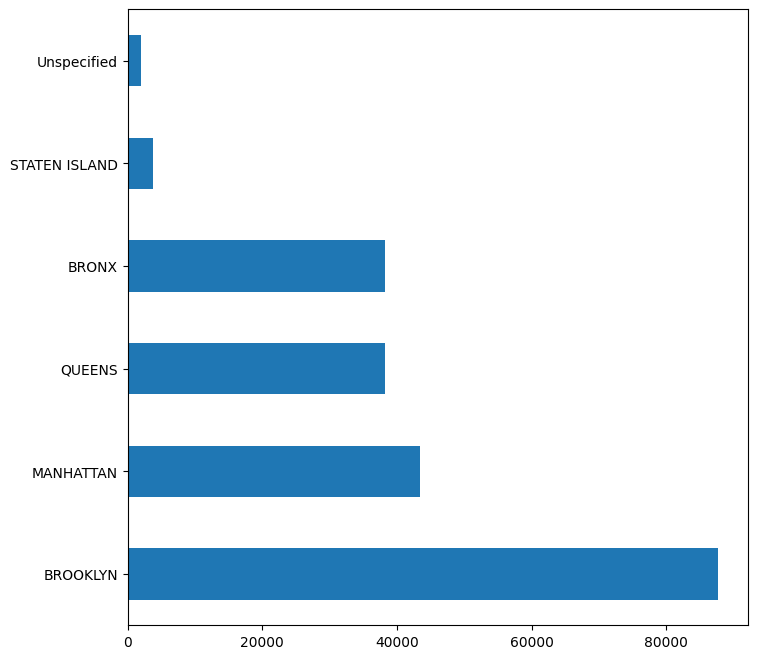

In [16]:
df_graffiti['Borough'].value_counts().plot(kind='barh')

In [17]:
df_graffiti.groupby('year')['Incident Address'].value_counts()

year  Incident Address     
2010  79 GANSEVOORT STREET     21
      248-07 UNION TURNPIKE    15
      64 FORSYTH STREET        13
      826 EAST 160 STREET      13
      50-27 31 AVENUE          12
                               ..
2023  W 33RD ST                 1
      WEST 2 ST                 1
      WYCKOFF AVE               1
      Wilson street             1
      Wyckoff ave               1
Name: Incident Address, Length: 172664, dtype: int64

In [18]:
# df_graffiti.groupby('year')['Incident Address'].value_counts()

df_graffiti[df_graffiti.year == '2022']['Incident Address'].value_counts().head(10)

RIVERSIDE PARK                  34
3545 JEROME AVENUE              32
FLUSHING MEADOWS CORONA PARK    27
1000 5 AVENUE                   26
95 PROSPECT PARK WEST           25
PELHAM BAY PARK                 17
375 COURT STREET                16
3 WASHINGTON SQUARE NORTH       15
MARINE PARK                     14
2582 HERING AVENUE              13
Name: Incident Address, dtype: int64

In [19]:
# df_graffiti.groupby('year')['Incident Address'].value_counts()

df_graffiti[df_graffiti.year == '2022']['Borough'].value_counts().head(10)

BROOKLYN         8329
QUEENS           2537
MANHATTAN        2488
BRONX            1260
STATEN ISLAND     217
Unspecified        12
Name: Borough, dtype: int64

In [20]:
# df_graffiti.groupby('year')['Incident Address'].value_counts()

df_graffiti[df_graffiti.year == '2021']['Borough'].value_counts().head(10)

BROOKLYN         2588
QUEENS           1317
MANHATTAN        1247
BRONX             638
STATEN ISLAND     189
Unspecified       160
Name: Borough, dtype: int64

In [21]:
df_graffiti[df_graffiti['Incident Address'] == '1000 5 AVENUE']['Resolution Description']

450       NYC Parks has completed the requested work ord...
175339    The Department of Parks and Recreation has com...
176184    The Department of Parks and Recreation has com...
178222    No action was taken because the Department of ...
178851    The Department of Parks and Recreation has com...
                                ...                        
211853    NYC Parks has completed the requested work ord...
211854    NYC Parks has completed the requested work ord...
211855    NYC Parks has completed the requested work ord...
211856    NYC Parks has completed the requested work ord...
213073                                                  NaN
Name: Resolution Description, Length: 65, dtype: object

<Axes: >

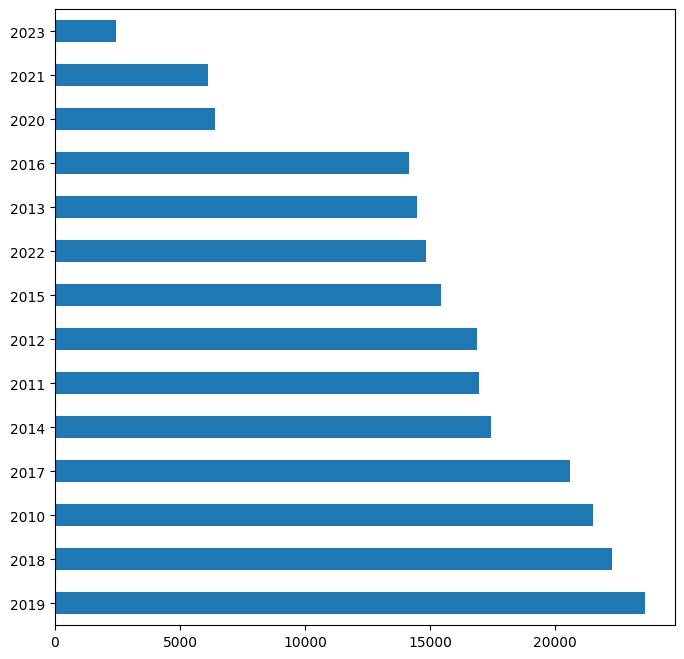

In [22]:
df_graffiti['year'].value_counts().plot(kind='barh')

In [23]:
df_graffiti['Resolution Description'].value_counts().head(40)


The City has removed the graffiti from this property.                                                                                                                                                                                                               123589
The City inspected the property for cleaning, but no graffiti was found.                                                                                                                                                                                             20236
The graffiti on this property has been scheduled to be removed by the City.                                                                                                                                                                                          12853
The cleaning crew was dispatched, but the owner refused to have the graffiti removed.                                                                                                                  

In [24]:
df_graffiti['year']=df_graffiti['Created Date'].str.extract("\d\d[/]\d\d[/](\d\d\d\d)")
df_graffiti['year']
# df_large_districts['first_named']=df_large_districts.notice_body.str.extract("WHEREAS ([A-Z][\w ]*)[^ \w]")

0         2017
1         2023
2         2023
3         2023
4         2023
          ... 
213242    2017
213243    2017
213244    2017
213245    2017
213246    2017
Name: year, Length: 213247, dtype: object

<Axes: >

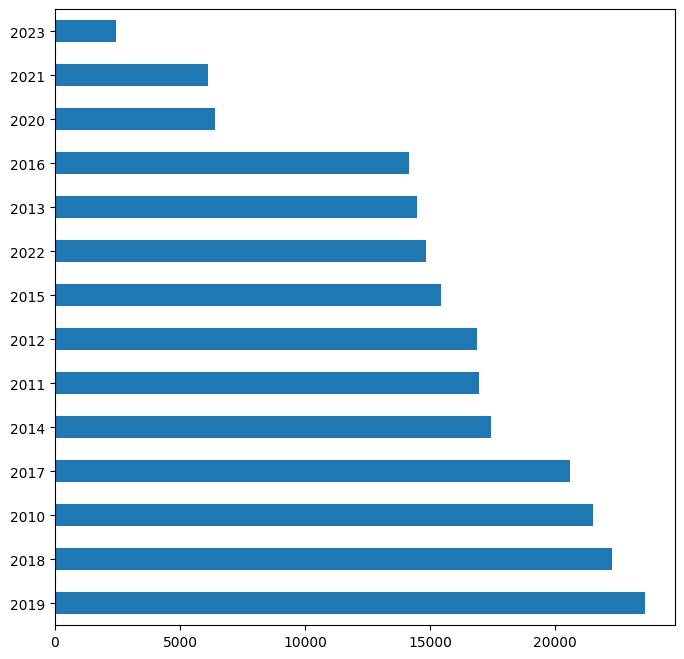

In [25]:
df_graffiti['year'].value_counts().plot(kind='barh')

In [26]:
df_all_graffiti_tasks=pd.read_csv("all_graffiti_tasks.csv")
df_all_graffiti_tasks

,row_id,gispropnum,omppropid,gisobjid,route_id,off_route,description,district,sector,sector_name,sector_desc,vehicle_number,date_worked,start_time,end_time,activity,animal_waste,broken_glass,dumping,graffiti,medical_waste,napsw,ncpw,ncsa,npop,nnpw,ncrew,fixed_post,nhours,daily_task_id,daily_task_activity_id,overlap_flag,fiscal_day,fiscal_week,fiscal_qtr
0,2517450,M081,M081,"100,005,113",NaN,No,M081 | Carl Schurz Park,M-08,M-S6.8.15,Manhattan Sector 6.8.15,"Districts 6, 8, 15",NaN,07/17/2019,07/17/2019 07:00:00 AM,07/17/2019 03:30:00 PM,Work,Yes,Yes,Yes,Yes,No,0,1,0,4,0,5,Yes,2,822084,3420168,1,16,2,2020Q1
1,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2
2,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2
3,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2
4,7006350,M019,M019,"100,004,339",NaN,No,M019 | Coleman Playground,M-03,M-S3,Manhattan Sector 3,District 3,NaN,05/07/2022,05/07/2022 07:30:00 AM,05/07/2022 03:00:00 PM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,0,0,1,Yes,2,1393104,5608062,1,310,44,2022Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403110,2631591,M081,M081-ZN01,"100,005,530",NaN,No,M081-ZN01 | Carl Schurz Park-Carl Schurz Main ...,M-08,M-S6.8.15,Manhattan Sector 6.8.15,"Districts 6, 8, 15",NaN,01/23/2020,01/23/2020 07:15:00 AM,01/23/2020 03:15:00 PM,Work,Yes,Yes,Yes,Yes,No,1,0,0,4,0,5,Yes,3,937736,3912268,1,206,29,2020Q3
403111,2684331,M235,M235,"100,004,280","2,559",Yes,M235 | Sol Lain Plgd,M-03,M-S3,Manhattan Sector 3,District 3,"7,092",11/25/2022,11/25/2022 08:12:00 AM,11/25/2022 12:00:00 PM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,1,0,2,No,1,1505328,6020922,1,147,21,2023Q2
403112,5696896,X217,X217,"100,005,063","2,103",No,X217 | Willis Playground,X-01,X-S1.2,Bronx Sector 1.2,"Districts 1, 2","7,271",11/12/2020,11/12/2020 08:55:00 AM,11/12/2020 09:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,2,0,4,0,6,No,0,1086302,4495196,0,134,19,2021Q2
403113,5696896,X217,X217,"100,005,063","2,103",No,X217 | Willis Playground,X-01,X-S1.2,Bronx Sector 1.2,"Districts 1, 2","7,271",11/12/2020,11/12/2020 08:55:00 AM,11/12/2020 09:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,2,0,4,0,6,No,0,1086302,4495196,0,134,19,2021Q2


In [31]:
df_all_graffiti_tasks[df_all_graffiti_tasks.graffiti=='Yes']

,row_id,gispropnum,omppropid,gisobjid,route_id,off_route,description,district,sector,sector_name,sector_desc,vehicle_number,date_worked,start_time,end_time,activity,animal_waste,broken_glass,dumping,graffiti,medical_waste,napsw,ncpw,ncsa,npop,nnpw,ncrew,fixed_post,nhours,daily_task_id,daily_task_activity_id,overlap_flag,fiscal_day,fiscal_week,fiscal_qtr
0,2517450,M081,M081,"100,005,113",NaN,No,M081 | Carl Schurz Park,M-08,M-S6.8.15,Manhattan Sector 6.8.15,"Districts 6, 8, 15",NaN,07/17/2019,07/17/2019 07:00:00 AM,07/17/2019 03:30:00 PM,Work,Yes,Yes,Yes,Yes,No,0,1,0,4,0,5,Yes,2,822084,3420168,1,16,2,2020Q1
1,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2
2,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2
3,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2
4,7006350,M019,M019,"100,004,339",NaN,No,M019 | Coleman Playground,M-03,M-S3,Manhattan Sector 3,District 3,NaN,05/07/2022,05/07/2022 07:30:00 AM,05/07/2022 03:00:00 PM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,0,0,1,Yes,2,1393104,5608062,1,310,44,2022Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403110,2631591,M081,M081-ZN01,"100,005,530",NaN,No,M081-ZN01 | Carl Schurz Park-Carl Schurz Main ...,M-08,M-S6.8.15,Manhattan Sector 6.8.15,"Districts 6, 8, 15",NaN,01/23/2020,01/23/2020 07:15:00 AM,01/23/2020 03:15:00 PM,Work,Yes,Yes,Yes,Yes,No,1,0,0,4,0,5,Yes,3,937736,3912268,1,206,29,2020Q3
403111,2684331,M235,M235,"100,004,280","2,559",Yes,M235 | Sol Lain Plgd,M-03,M-S3,Manhattan Sector 3,District 3,"7,092",11/25/2022,11/25/2022 08:12:00 AM,11/25/2022 12:00:00 PM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,1,0,2,No,1,1505328,6020922,1,147,21,2023Q2
403112,5696896,X217,X217,"100,005,063","2,103",No,X217 | Willis Playground,X-01,X-S1.2,Bronx Sector 1.2,"Districts 1, 2","7,271",11/12/2020,11/12/2020 08:55:00 AM,11/12/2020 09:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,2,0,4,0,6,No,0,1086302,4495196,0,134,19,2021Q2
403113,5696896,X217,X217,"100,005,063","2,103",No,X217 | Willis Playground,X-01,X-S1.2,Bronx Sector 1.2,"Districts 1, 2","7,271",11/12/2020,11/12/2020 08:55:00 AM,11/12/2020 09:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,2,0,4,0,6,No,0,1086302,4495196,0,134,19,2021Q2


In [32]:
df_all_graffiti_tasks['year_worked']=df_all_graffiti_tasks.date_worked.str.extract('\d\d/\d\d/(\d\d\d\d)$')
df_all_graffiti_tasks


,row_id,gispropnum,omppropid,gisobjid,route_id,off_route,description,district,sector,sector_name,sector_desc,vehicle_number,date_worked,start_time,end_time,activity,animal_waste,broken_glass,dumping,graffiti,medical_waste,napsw,ncpw,ncsa,npop,nnpw,ncrew,fixed_post,nhours,daily_task_id,daily_task_activity_id,overlap_flag,fiscal_day,fiscal_week,fiscal_qtr,year_worked
0,2517450,M081,M081,"100,005,113",NaN,No,M081 | Carl Schurz Park,M-08,M-S6.8.15,Manhattan Sector 6.8.15,"Districts 6, 8, 15",NaN,07/17/2019,07/17/2019 07:00:00 AM,07/17/2019 03:30:00 PM,Work,Yes,Yes,Yes,Yes,No,0,1,0,4,0,5,Yes,2,822084,3420168,1,16,2,2020Q1,2019
1,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2,2022
2,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2,2022
3,7809320,XZ19,XZ19,"100,006,921","2,756",No,XZ19 | Southern And 179th Street,X-06,X-S3.6,Bronx Sector 3.6,"Districts 3, 6",0,11/13/2022,11/13/2022 07:35:00 AM,11/13/2022 10:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,3,0,4,No,0,1499608,5997023,1,135,20,2023Q2,2022
4,7006350,M019,M019,"100,004,339",NaN,No,M019 | Coleman Playground,M-03,M-S3,Manhattan Sector 3,District 3,NaN,05/07/2022,05/07/2022 07:30:00 AM,05/07/2022 03:00:00 PM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,0,0,1,Yes,2,1393104,5608062,1,310,44,2022Q4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403110,2631591,M081,M081-ZN01,"100,005,530",NaN,No,M081-ZN01 | Carl Schurz Park-Carl Schurz Main ...,M-08,M-S6.8.15,Manhattan Sector 6.8.15,"Districts 6, 8, 15",NaN,01/23/2020,01/23/2020 07:15:00 AM,01/23/2020 03:15:00 PM,Work,Yes,Yes,Yes,Yes,No,1,0,0,4,0,5,Yes,3,937736,3912268,1,206,29,2020Q3,2020
403111,2684331,M235,M235,"100,004,280","2,559",Yes,M235 | Sol Lain Plgd,M-03,M-S3,Manhattan Sector 3,District 3,"7,092",11/25/2022,11/25/2022 08:12:00 AM,11/25/2022 12:00:00 PM,Work,Yes,Yes,Yes,Yes,Yes,0,1,0,1,0,2,No,1,1505328,6020922,1,147,21,2023Q2,2022
403112,5696896,X217,X217,"100,005,063","2,103",No,X217 | Willis Playground,X-01,X-S1.2,Bronx Sector 1.2,"Districts 1, 2","7,271",11/12/2020,11/12/2020 08:55:00 AM,11/12/2020 09:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,2,0,4,0,6,No,0,1086302,4495196,0,134,19,2021Q2,2020
403113,5696896,X217,X217,"100,005,063","2,103",No,X217 | Willis Playground,X-01,X-S1.2,Bronx Sector 1.2,"Districts 1, 2","7,271",11/12/2020,11/12/2020 08:55:00 AM,11/12/2020 09:00:00 AM,Work,Yes,Yes,Yes,Yes,Yes,0,2,0,4,0,6,No,0,1086302,4495196,0,134,19,2021Q2,2020


<Axes: >

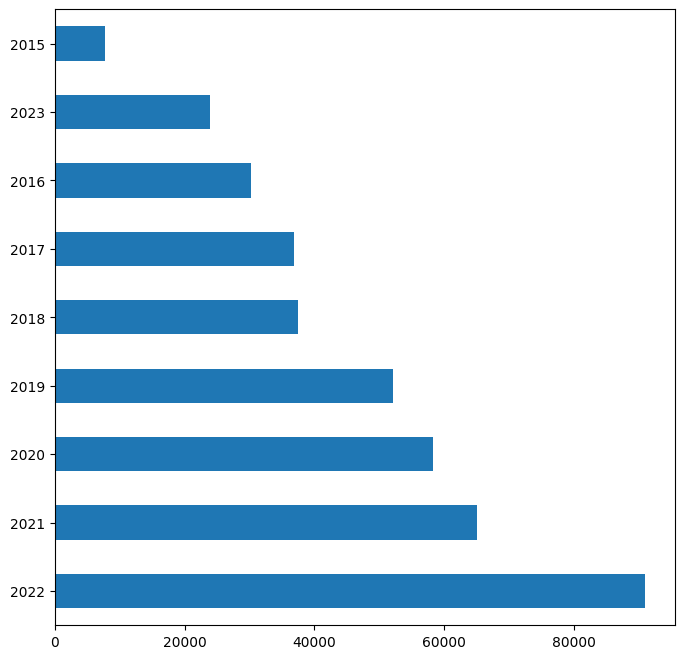

In [33]:
df_all_graffiti_tasks['year_worked'].value_counts().plot(kind='barh')

In [34]:
df_all_graffiti_tasks['year_worked'].value_counts()

2022    91083
2021    65160
2020    58295
2019    52186
2018    37421
2017    36942
2016    30294
2023    23967
2015     7767
Name: year_worked, dtype: int64